# 画像処理-ndimage

`scipy.ndimage`は多次元画像を処理するための関数ライブラリで、以下のモジュールを含んでいます：

* `filters`：画像フィルタ
* `fourier`：フーリエ変換
* `interpolation`：画像の補間、回転、アフィン変換など
* `measurements`：画像関連情報の測定
* `morphology`：形態学的画像処理

In [1]:
from matplotlib import pyplot as plt
import numpy as np

:::{admonition} より強力な画像処理ライブラリ
:class: seealso
`scipy.ndimage`は基本的な画像処理機能しか提供していませんが、以下はより強力な画像処理ライブラリです：

* OpenCV：C/C++で開発されたコンピュータビジョンライブラリです。
* scikit-image：Pythonで開発された画像処理ライブラリで、高速計算部分はCythonで書かれています。
:::

## 形態学的画像処理

このセクションでは、`morphology`モジュールを使用して二値画像処理を実装する方法を紹介します。二値画像の各ピクセルの色は黒と白の2色しかありません。NumPyでは、2次元のブール配列で表すことができます：`False`は黒、`True`は白を表します。また、符号なし1バイト整数型（uint8）配列で表すこともできます：0は黒、非0は白を表します。

以下の2つの関数は、形態学的画像処理の結果を表示するために使用されます。

In [2]:
import numpy as np


def expand_image(img, value, out=None, size=10):
    if out is None:
        w, h = img.shape
        out = np.zeros((w * size, h * size), dtype=np.uint8)

    tmp = np.repeat(np.repeat(img, size, 0), size, 1)
    out[:, :] = np.where(tmp, value, out)
    out[::size, :] = 0
    out[:, ::size] = 0
    return out


def show_image(*imgs):
    for idx, img in enumerate(imgs, 1):
        ax = plt.subplot(1, len(imgs), idx)
        plt.imshow(img, cmap="gray")
        ax.set_axis_off()
    plt.subplots_adjust(0.02, 0, 0.98, 1, 0.02, 0)

### 膨張と収縮

二値画像の最も基本的な形態学的演算は膨張と収縮です。膨張演算は、ある物体（白い領域）に接触するすべての背景ピクセル（黒い領域）をその物体に統合するプロセスです。簡単に言えば、元の画像の各白いピクセルを処理し、その周囲の黒いピクセルをすべて白いピクセルに設定します。ここでの「周囲」は曖昧な概念で、実際の演算では「周囲」の定義を明確にする必要があります。以下の図は膨張演算の例で、左図は元の画像、中央の図は四連結で定義された「周囲」の膨張効果、右図は八連結で定義された「周囲」の膨張効果を示しています。図中の灰色の四角は、膨張処理によって物体に追加されたピクセルを示しています。

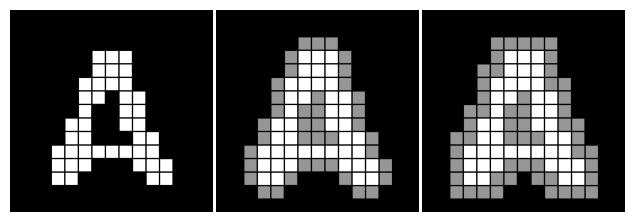

In [3]:
from scipy import ndimage


def dilation_demo(a, structure=None):
    b = ndimage.binary_dilation(a, structure)
    img = expand_image(a, 255)
    return expand_image(np.logical_xor(a, b), 150, out=img)


a = plt.imread("data/scipy_morphology_demo.png")[:, :, 0].astype(np.uint8)
img1 = expand_image(a, 255)

img2 = dilation_demo(a)
img3 = dilation_demo(a, [[1, 1, 1], [1, 1, 1], [1, 1, 1]])
show_image(img1, img2, img3)

四連結は上下左右の4つのピクセルを含み、八連結はさらに4つの斜め方向の隣接ピクセルを含みます。これらは以下の正方形行列で定義できます。中心の要素は現在処理するピクセルを示し、その周囲の1と0は対応する位置のピクセルが「周囲」のピクセルとしてカウントされるかどうかを示します。この行列は周囲のピクセルと現在のピクセルの関係を記述し、構造要素（structuring element）と呼ばれます。

```
四連結     八連結
0 1 0      1 1 1
1 1 1      1 1 1
0 1 0      1 1 1
```

配列aが二値画像を表す配列である場合、以下の文で膨張演算を行うことができます：

```python
binary_dilation(a)
```

`binary_dilation()`はデフォルトで四連結を使用して膨張演算を行います。`structure`パラメータを使用して他の構造要素を指定できます。以下は八連結で膨張演算を行う文です：

```python
binary_dilation(a, structure=[[1,1,1],[1,1,1],[1,1,1]])
```
    
異なる構造要素を設定することで、さまざまな効果を実現できます。以下は3つの異なる構造要素の膨張効果を示しています。図中の構造要素は以下の通りです：

```
 左       中      右
0 0 0   0 1 0   0 1 0
1 1 1   0 1 0   0 1 0
0 0 0   0 1 0   0 0 0
```

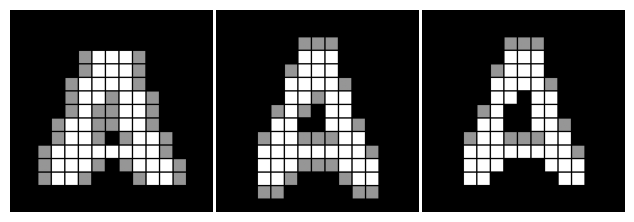

In [4]:
img4 = dilation_demo(a, [[0, 0, 0], [1, 1, 1], [0, 0, 0]])
img5 = dilation_demo(a, [[0, 1, 0], [0, 1, 0], [0, 1, 0]])
img6 = dilation_demo(a, [[0, 1, 0], [0, 1, 0], [0, 0, 0]])
show_image(img4, img5, img6)

`binary_erosion()`の収縮演算は膨張とは逆で、「周囲」に黒いピクセルがある白いピクセルを黒に設定します。以下は四連結と八連結の収縮効果で、図中の灰色の四角は収縮されたピクセルを示しています。

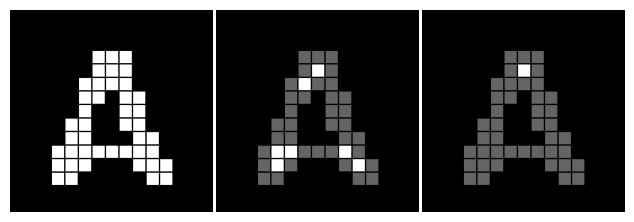

In [5]:
def erosion_demo(a, structure=None):
    b = ndimage.binary_erosion(a, structure)
    img = expand_image(a, 255)
    return expand_image(np.logical_xor(a, b), 100, out=img)


img1 = expand_image(a, 255)
img2 = erosion_demo(a)
img3 = erosion_demo(a, [[1, 1, 1], [1, 1, 1], [1, 1, 1]])
show_image(img1, img2, img3)

### HitとMiss

HitとMissは二値形態学的画像処理の最も基本的な演算で、ほとんどすべての他の演算はHitとMissの組み合わせで導出できます。これは画像の各ピクセルの周囲のピクセルをパターン判定し、周囲のピクセルの白黒パターンが指定されたパターンに一致する場合、そのピクセルを白に設定し、そうでない場合は黒に設定します。白と黒の両方のピクセルを同時に判定する必要があるため、2つの構造要素を指定する必要があります。HitとMiss演算を行う`binary_hit_or_miss()`の呼び出し形式は以下の通りです：

```python
binary_hit_or_miss(input, structure1=None, structure2=None, ...)
```
    
ここで、`structure1`パラメータは白いピクセルの構造要素を指定し、`structure2`パラメータは黒いピクセルの構造要素を指定します。`ref:fig-next`は`binary_hit_or_miss()`の演算結果です。左図は元の画像で、中央の図は以下の2つの構造要素を使用して演算した結果です：

```
白い構造要素    黒い構造要素
  0 0 0          1 0 0
  0 1 0          0 0 0
  1 1 1          0 0 0
```
これらの構造要素では、0は対応する位置のピクセルの色を気にしないことを示し、1は対応する位置のピクセルが構造要素で示される色でなければならないことを示します。したがって、これらの構造要素を使用して「下の3つのピクセルが白で、左上のピクセルが黒である白いピクセル」を見つけることができます。

右図に対応する構造要素は以下の通りです。これを使用して「下の3つのピクセルが白で、左上のピクセルが黒である黒いピクセル」を見つけることができます。

    白い構造要素    黒い構造要素
      0 0 0          1 0 0
      0 0 0          0 1 0
      1 1 1          0 0 0

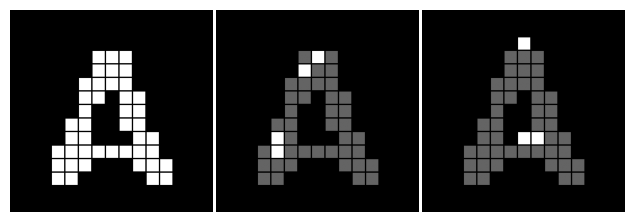

In [6]:
def hitmiss_demo(a, structure1, structure2):
    b = ndimage.binary_hit_or_miss(a, structure1, structure2)
    img = expand_image(a, 100)
    return expand_image(b, 255, out=img)


img1 = expand_image(a, 255)

img2 = hitmiss_demo(
    a, [[0, 0, 0], [0, 1, 0], [1, 1, 1]], [[1, 0, 0], [0, 0, 0], [0, 0, 0]]
)
img3 = hitmiss_demo(
    a, [[0, 0, 0], [0, 0, 0], [1, 1, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 0]]
)

show_image(img1, img2, img3)

HitとMiss演算の組み合わせを使用して、複雑な画像処理を実現できます。例えば、文字認識でよく使用される細線化演算は、一連のHitとMiss演算で実現できます。`ref:fig-next`は細線化処理の効果を示しており、その実装プログラムは以下の通りです：

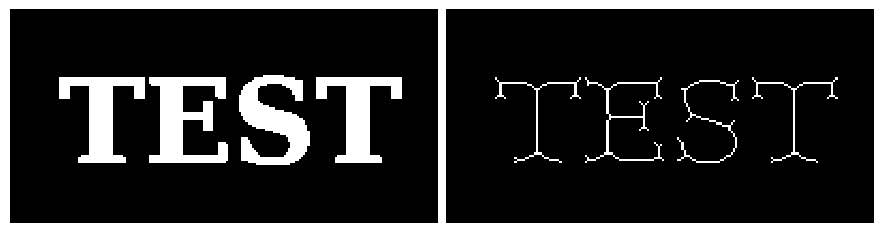

In [7]:
def skeletonize(img):
    h1 = np.array([[0, 0, 0], [0, 1, 0], [1, 1, 1]])  #❶
    m1 = np.array([[1, 1, 1], [0, 0, 0], [0, 0, 0]])
    h2 = np.array([[0, 0, 0], [1, 1, 0], [0, 1, 0]])
    m2 = np.array([[0, 1, 1], [0, 0, 1], [0, 0, 0]])
    hit_list = []
    miss_list = []
    for k in range(4):  #❷
        hit_list.append(np.rot90(h1, k))
        hit_list.append(np.rot90(h2, k))
        miss_list.append(np.rot90(m1, k))
        miss_list.append(np.rot90(m2, k))
    img = img.copy()
    while True:
        last = img
        for hit, miss in zip(hit_list, miss_list):
            hm = ndimage.binary_hit_or_miss(img, hit, miss)  #❸
            # 画像からhit_or_missで得られた白い点を削除
            img = np.logical_and(img, np.logical_not(hm))  #❹
        # 処理後の画像が処理前の画像と同じ場合、処理を終了
        if np.all(img == last):  #❺
            break
    return img


a = plt.imread("data/scipy_morphology_demo2.png")[:, :, 0].astype(np.uint8)
b = skeletonize(a)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
ax1.imshow(a, cmap="gray", interpolation="nearest")
ax2.imshow(b, cmap="gray", interpolation="nearest")
ax1.set_axis_off()
ax2.set_axis_off()
plt.subplots_adjust(0.02, 0, 0.98, 1, 0.02, 0)

❶`ref:fig-next`に示す2つの構造要素を基に、形状が`(3, 3)`の2次元配列`h1`、`m1`、`h2`、`m2`を構築します。`h1`と`m1`は図の左側の構造要素に対応し、`h2`と`m2`は図の右側の構造要素に対応します。`h1`と`h2`は白い構造要素、`m1`と`m2`は黒い構造要素に対応します。❷これらの構造要素を90、180、270度回転させ、合計8つの構造要素を取得します。

❸これらの構造要素を順番に使用してHitとMiss演算を行い、❹画像から演算で得られた白いピクセルを削除します。これにより、8つの方向から順番に画像の端のピクセルを削除する効果が得られます。❺削除するピクセルがなくなるまで演算を繰り返します。

![細線化アルゴリズムの4つの構造要素](images/scipy_image_skeletonization_01_large.png)

## 画像分割

以下では、矩形領域の識別を例として、`measurements`と`morphology`を使用して画像領域を分割する方法を紹介します。矩形情報を抽出する画像は`ref:fig-next`に示されています。この画像は二値画像で、矩形領域は白、背景は黒です。ただし、"JPEG"形式で保存されているため、`pyplot.imread()`で読み取ると形状が(高さ, 幅, 3)の3チャンネル画像になります。以下のプログラムはその第0チャンネルを使用して二値配列`squares`に変換し、矩形領域を1、背景を0に設定します。その結果は`ref:fig-next`（左上）に示されています。

In [8]:
squares = plt.imread("data/squares.jpg")
squares = (squares[:, :, 0] < 200).astype(np.uint8)

多くの矩形が近くの矩形と小さな突起で接続されているため、まず各矩形を周囲の矩形から分離する必要があります。前節で紹介した二値収縮関数`morphology.binary_erosion()`を使用してこの機能を実現できますが、ここでは別の方法を採用します。

`morphology.distance_transform_cdt(image)`は二値画像の各ピクセルから最も近い黒いピクセルまでの距離を計算し、すべての距離を保存した配列を返します。画像上の2点間の距離には多くの定義方法がありますが、この関数はデフォルトで**チェビシェフ距離**を使用します。2点間のチェビシェフ距離は、各座標の数値差の最大値として定義されます：$D_{Chess} = \max \left ( \left | x_2 - x_1 \right | , \left | y_2 - y_1 \right | \right )$。

以下では、`distance_transform_cdt(squares)`を呼び出して距離配列`squares_dt`を取得し、図に描画します。図中の色が赤いほど、その点が黒い背景から遠いことを示し、元の画像で値が0のピクセルに対応する距離は0で、黒い背景から最も遠い距離は27ピクセルです。距離配列を画像として出力すると、その表示効果は`ref:fig-next`（中上）のようになります。

In [9]:
squares_dt = ndimage.distance_transform_cdt(squares)
print("各種距離値", np.unique(squares_dt))

各種距離値 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


適切な閾値を選択して距離配列`squares_dt`を二値配列に変換することで、矩形領域を分離できます。その効果は収縮アルゴリズムと似ています。`squares_core`では、各矩形領域が十分に縮小され、どの2つの領域も接続されていない状態になります。その効果は`ref:fig-next`（右上）に示されており、すべての領域が隣接する領域から分離されていることがわかります。

In [10]:
squares_core = (squares_dt > 8).astype(np.uint8)

以下では、`measurements`モジュールの`label()`と`center_of_mass()`を呼び出して、各独立した白色領域に色を付け、各領域の重心座標を計算します。

`labels()`は、二値画像内の各独立した白色領域に一意の整数を割り当てます。これは、各領域に異なる「色」を付けることに相当します。ここでの「色」とは、各領域に割り当てられた整数を指し、画像内のピクセルの実際の色を指すものではありません。

`labels()`が返す結果の配列は、各領域の統計情報を計算するために使用できます。例えば、`center_of_mass()`を呼び出して各領域の重心を計算できます。最初の引数は各ピクセルの重み（各ピクセルの質量密度と考えることができます）で、2番目の引数は`labels()`が出力する色付け配列です。3番目の引数は、重心を計算する領域のラベルのリストです。以下のプログラムでは、重み配列と色付け配列が同じであるため、領域内のすべての白色ピクセルの重心を計算できます。

`labels()`が出力する色付け配列を直接`imshow()`で表示すると、領域の色が徐々に変化する画像が得られますが、このような画像は肉眼で各領域を識別するのに適していません。そのため、以下のプログラムでは`random_palette()`を使用して、各整数にランダムな色を割り当てます。結果は`ref:fig-next`（左下）に示すように、各領域の重心は白色の小さな円で表示されます。

In [11]:
def random_palette(labels, count, seed=1):
    np.random.seed(seed)
    palette = np.random.rand(count + 1, 3)
    palette[0, :] = 0
    return palette[labels]


labels, count = ndimage.label(squares_core)
h, w = labels.shape
centers = np.array(
    ndimage.center_of_mass(labels, labels, index=range(1, count + 1)), np.int16
)
cores = random_palette(labels, count)

領域識別のタスクはほぼ完了しましたが、各矩形領域は元の画像よりも少し小さくなっています。以下では、色付けされた矩形領域を元の画像のサイズに戻します。つまり、元の画像で白色であり、腐食後の画像で黒色である各ピクセルについて、その色を色付け配列内で最も近い領域の色に設定します。具体的な計算手順は以下の通りです：

❶ 腐食後の画像`square_core`を反転し、`distance_transform_cdt()`を呼び出します。これにより、`square_core`内の各黒色ピクセルに最も近い白色ピクセルの座標を見つけることができます。座標情報を返すためには、パラメータ`return_indices`を`True`に設定する必要があります。ここでは距離情報は必要ないため、パラメータ`return_distances`を`False`に設定できます。戻り値`index`は形状が(2, 高さ, 幅)の3次元配列です。`index[0]`は最も近いピクセルの第0軸（縦軸）座標、`index[1]`は最も近いピクセルの第1軸（横軸）座標です。

❷ `index[0]`と`index[1]`を使用して、`labels`内の対応する座標の色を取得し、`near_labels`を得ます。

❸ ブール配列`mask`を作成し、その中の各`True`値は`squares`で白色であり、`squares_core`で黒色であるピクセルに対応します。そして、`labels`を`labels2`にコピーし、最後に`mask`内の`True`に対応する`near_labels`の色の値を`labels2`にコピーします。

`ref:fig-next`（中下）は、`random_palette()`を使用してランダムに色付けした結果です。

In [12]:
index = ndimage.distance_transform_cdt(
    1 - squares_core, return_distances=False, return_indices=True
)  #❶
near_labels = labels[index[0], index[1]]  #❷

mask = (squares - squares_core).astype(bool)
labels2 = labels.copy()
labels2[mask] = near_labels[mask]  #❸
separated = random_palette(labels2, count)

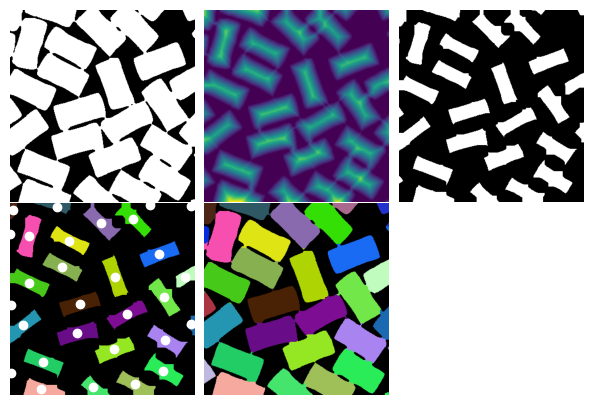

In [13]:
fig, axes = plt.subplots(
    2,
    3,
    figsize=(7.5, 5.0),
)
fig.delaxes(axes[1, 2])
axes[0, 0].imshow(squares, cmap="gray")
axes[0, 1].imshow(squares_dt)
axes[0, 2].imshow(squares_core, cmap="gray")
ax = axes[1, 0]
ax.imshow(cores)
center_y, center_x = centers.T
ax.plot(center_x, center_y, "o", color="white")
ax.set_xlim(0, w)
ax.set_ylim(h, 0)

axes[1, 1].imshow(separated)

for ax in axes.ravel():
    ax.axis("off")

fig.subplots_adjust(wspace=0.01, hspace=0.01)